<a href="https://colab.research.google.com/github/Mo427-Ashraf/1strepo/blob/sec-branch/KMeans_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import seaborn as sns
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
df=pd.read_csv('customer_data.csv')
df.head(5)

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6
1,2,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6
2,3,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6
3,4,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7
4,5,31,Female,46952,College,North,Regular,occasional,19685,Clothing,1,5


In [ ]:
df=df.drop(columns='loyalty_status')
X = df.drop('id', axis=1)

In [ ]:
df.head(5)

,id,age,gender,income,education,region,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,1,27,Male,40682,Bachelor,East,frequent,18249,Books,0,6
1,2,29,Male,15317,Masters,West,rare,4557,Clothing,1,6
2,3,37,Male,38849,Bachelor,West,rare,11822,Clothing,0,6
3,4,30,Male,11568,HighSchool,South,frequent,4098,Food,0,7
4,5,31,Female,46952,College,North,occasional,19685,Clothing,1,5


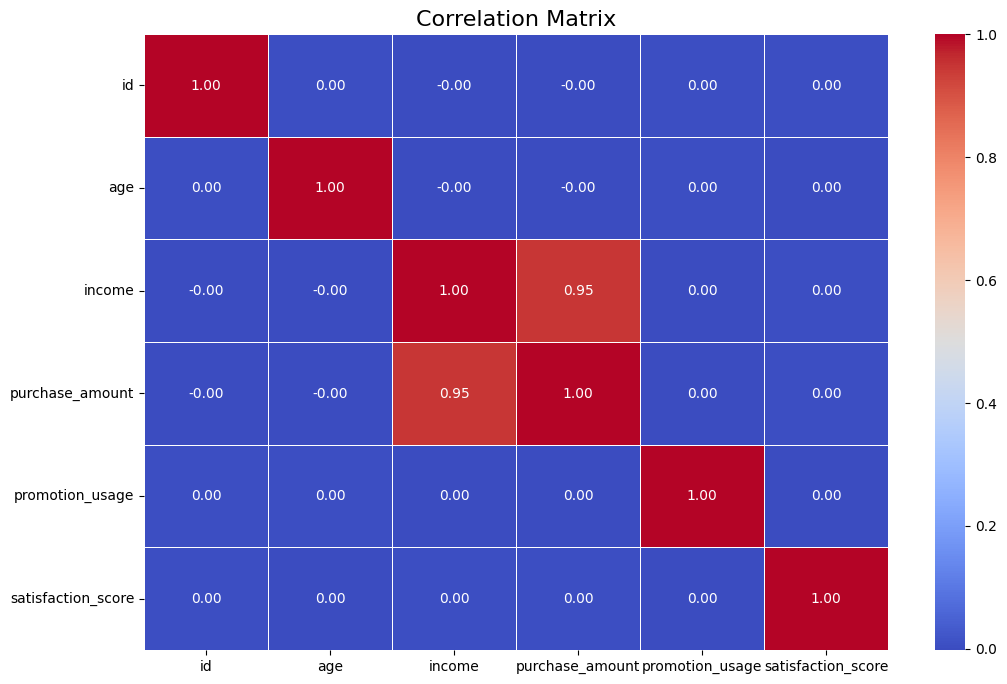

In [ ]:
numeric_data = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the correlation matrix with values
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

Looking at this Co-rrelation Matrix we find only the relavent attributes are the incom and purchase amount.

In [ ]:
X=X[['income','purchase_amount']]
X.head()

,income,purchase_amount
0,40682,18249
1,15317,4557
2,38849,11822
3,11568,4098
4,46952,19685


In [ ]:
scores_df={}
for i in range (3,7):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    scores_df[i]=score
    print(f'Silhouette Score: {round(score,2)} for number of clusters: {i}')
df['Cluster'] = kmeans.labels_

Silhouette Score: 0.53 for number of clusters: 3
Silhouette Score: 0.49 for number of clusters: 4
Silhouette Score: 0.46 for number of clusters: 5
Silhouette Score: 0.44 for number of clusters: 6


In [ ]:
scores=pd.DataFrame(scores_df,index=['Silhouette Score']).T
scores = scores.reset_index().rename(columns={'index': 'Number of Clusters'})
scores

,Number of Clusters,Silhouette Score
0,3,0.531254
1,4,0.492208
2,5,0.460311
3,6,0.436637


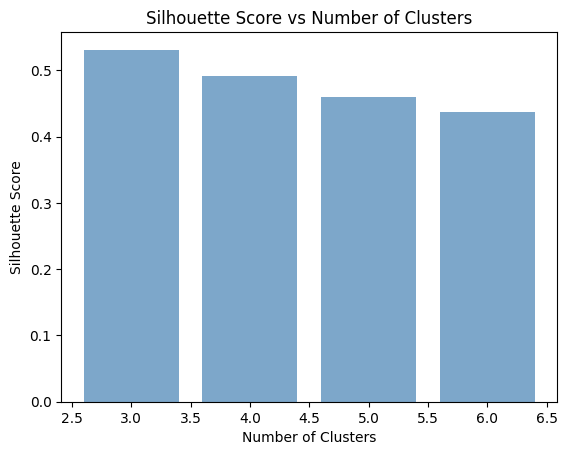

In [ ]:
plt.bar(scores['Number of Clusters'], scores['Silhouette Score'], color='SteelBlue', alpha=0.7)

# Labels and title
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()


From this graph we deduce the best **K is 3**. Now let's train our model on just two clusters and test it

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
df['Cluster'] = kmeans.labels_

In [ ]:
cluster_counts = df['Cluster'].value_counts()
cluster_counts = pd.DataFrame(cluster_counts)
cluster_counts = cluster_counts.reset_index()
cluster_counts

,Cluster,count
0,2,33931
1,0,33625
2,1,32444


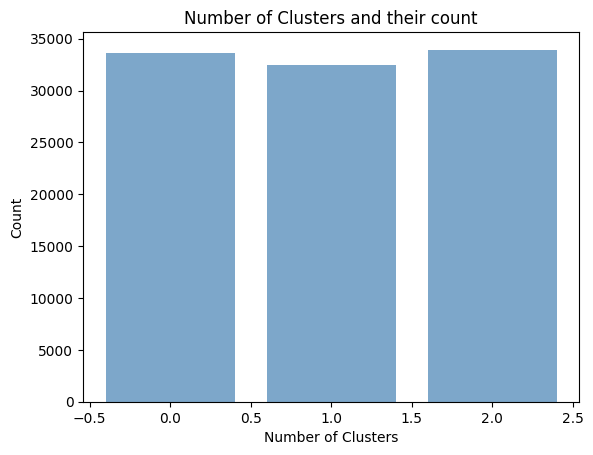

In [ ]:
plt.bar(cluster_counts['Cluster'], cluster_counts['count'], color='SteelBlue', alpha=0.7)

# Labels and title
plt.xlabel('Number of Clusters')
plt.ylabel('Count')
plt.title('Number of Clusters and their count')
plt.show()


Let's try it once without the removal of un-related features.

In [ ]:
X = df.drop('id', axis=1)
X.head()

,age,gender,income,education,region,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score,Cluster
0,27,Male,40682,Bachelor,East,frequent,18249,Books,0,6,1
1,29,Male,15317,Masters,West,rare,4557,Clothing,1,6,0
2,37,Male,38849,Bachelor,West,rare,11822,Clothing,0,6,1
3,30,Male,11568,HighSchool,South,frequent,4098,Food,0,7,0
4,31,Female,46952,College,North,occasional,19685,Clothing,1,5,1


In [ ]:
#Label Encoding four categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
columns=['education','region','gender','product_category','purchase_frequency']
for col in columns:
    X[col] = le.fit_transform(X[col])
X.head()

,age,gender,income,education,region,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score,Cluster
0,27,1,40682,0,0,0,18249,1,0,6,1
1,29,1,15317,3,3,2,4557,2,1,6,0
2,37,1,38849,0,3,2,11822,2,0,6,1
3,30,1,11568,2,2,0,4098,4,0,7,0
4,31,0,46952,1,1,1,19685,2,1,5,1


In [ ]:
scores_df={}
for i in range (2,7):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    scores_df[i]=score
    print(f'Silhouette Score: {score} for number of clusters: {i}')
df['Cluster'] = kmeans.labels_

Silhouette Score: 0.18932300457105444 for number of clusters: 2
Silhouette Score: 0.14046060253692166 for number of clusters: 3
Silhouette Score: 0.11347360542874994 for number of clusters: 4
Silhouette Score: 0.10278070169756767 for number of clusters: 5


In [ ]:
scores=pd.DataFrame(scores_df,index=['Silhouette Score']).T
scores = scores.reset_index().rename(columns={'index': 'Number of Clusters'})
scores

In [ ]:
plt.bar(scores['Number of Clusters'], scores['Silhouette Score'], color='SteelBlue', alpha=0.7)

# Labels and title
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()


**Note to Self** make income into low, medium and high increasing the variaty of it potentially increasing the accuracy of the model.